In [1]:
import numpy as np
import itertools
import datetime
import matplotlib.pyplot as plt

In [24]:
### 读取癌症样本
diffCancerDict = {}
sameCancerDict = {}
with open("/home/luohh/UKB50wMultiPcancer/01.data/04.sampleData/01.multiDiffPcancer/diffCancer.filtered.white.sample","r") as fi:
    for line in fi:
        diffCancerDict[line.strip()] = 0
fi.close()
with open("/home/luohh/UKB50wMultiPcancer/01.data/04.sampleData/02.multiSamePcancer/sameCancer.all.sampleid","r") as fi:
    for line in fi:
        sameCancerDict[line.strip()] = 0
fi.close()

In [25]:
# 分类
fo = open("/home/luohh/UKB50wMultiPcancer/05.otherAnalysis/01.globlePattern/01.data/04.diagDiffPlot/cancerDiagnose.sameCancer.date","w")
fe = open("/home/luohh/UKB50wMultiPcancer/05.otherAnalysis/01.globlePattern/01.data/04.diagDiffPlot/cancerDiagnose.diffCancer.date","w")
with open("/home/luohh/UKB50wMultiPcancer/05.otherAnalysis/01.globlePattern/01.data/03.diagnosisOrder/cancerDiagnose.allMPC.date","r") as fi:
    for line in fi:
        data = line.strip().split()
        if data[0] in sameCancerDict:
            fo.write(line)
        elif data[0] in diffCancerDict:
            fe.write(line)
fi.close()
fo.close()
fe.close()

In [28]:
category = ["anus","bone","brain","breast","cervix","colorectal","esophagus","eyeAndOrbit","gallbladderAndBiliaryTract","headAndNeck",
            "kaposiSarcoma","kidney","liver","lung","lymphoidNeoplasms","melanoma","mesothelioma","myeloidNeoplasms","otherDigestive",
           "otherEndocrine","otherFemaleGenital","otherMaleGenital","otherNervousSystem","otherRespiratory","otherUrinaryOrgans",
           "ovary","pancreas","prostate","smallIntestine","softTissueSarcoma","stomach","tCellAndNKCellNeoplasms","testis","thyroid",
           "urinaryBladder","uterus"]

### 36类癌症MPC 编码
categoryCodeDict = {}
for cancer in category:
    categoryCodeDict[cancer] = []

for i in range(15):
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
        categoryCodeDict["headAndNeck"].append("C{:0>2d}".format(i)+j)
categoryCodeDict["headAndNeck"].append("D000")

for i in ["C15"]:
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
            categoryCodeDict["esophagus"].append(i+j)
categoryCodeDict["esophagus"].append("D001")

for i in ["C16"]:
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
            categoryCodeDict["stomach"].append(i+j)
categoryCodeDict["stomach"].append("D002")

for i in ["C17"]:
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
            categoryCodeDict["smallIntestine"].append(i+j)

for i in range(18,21):
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
        categoryCodeDict["colorectal"].append("C{:0>2d}".format(i)+j)
categoryCodeDict["colorectal"].append("D010")
categoryCodeDict["colorectal"].append("D011")
categoryCodeDict["colorectal"].append("D012")

for i in ["C21"]:
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
            categoryCodeDict["anus"].append(i+j)
categoryCodeDict["anus"].append("D013")

for i in ["C22"]:
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
            categoryCodeDict["liver"].append(i+j)
            
for i in range(23,25):
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
        categoryCodeDict["gallbladderAndBiliaryTract"].append("C{:0>2d}".format(i)+j)

for i in ["C25"]:
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
            categoryCodeDict["pancreas"].append(i+j)

for i in [26,48]:
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
        categoryCodeDict["otherDigestive"].append("C{:0>2d}".format(i)+j)
categoryCodeDict["otherDigestive"].append("D014")
categoryCodeDict["otherDigestive"].append("D017")
categoryCodeDict["otherDigestive"].append("D019")

for i in [30,31,32,33,39]:
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
        categoryCodeDict["otherRespiratory"].append("C{:0>2d}".format(i)+j)
categoryCodeDict["otherRespiratory"].append("C381")
categoryCodeDict["otherRespiratory"].append("C382")
categoryCodeDict["otherRespiratory"].append("C383")
categoryCodeDict["otherRespiratory"].append("C384")
categoryCodeDict["otherRespiratory"].append("D020")
categoryCodeDict["otherRespiratory"].append("D021")
categoryCodeDict["otherRespiratory"].append("D023")

for i in ["C34"]:
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
            categoryCodeDict["lung"].append(i+j)
categoryCodeDict["lung"].append("D022")

for i in [37,74,75]:
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
        categoryCodeDict["otherEndocrine"].append("C{:0>2d}".format(i)+j)

for i in [40,41]:
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
        categoryCodeDict["bone"].append("C{:0>2d}".format(i)+j)

for i in ["C43"]:
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
            categoryCodeDict["melanoma"].append(i+j)
for i in ["D03"]:
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
            categoryCodeDict["melanoma"].append(i+j)

for i in [45]:
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
        categoryCodeDict["mesothelioma"].append("C{:0>2d}".format(i)+j)

for i in [46]:
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
        categoryCodeDict["mesothelioma"].append("C{:0>2d}".format(i)+j)

for i in [47,49]:
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
        categoryCodeDict["softTissueSarcoma"].append("C{:0>2d}".format(i)+j)

for i in ["C50"]:
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
            categoryCodeDict["breast"].append(i+j)
for i in ["D05"]:
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
            categoryCodeDict["breast"].append(i+j)

for i in [51,52,57,58]:
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
        categoryCodeDict["otherFemaleGenital"].append("C{:0>2d}".format(i)+j)
categoryCodeDict["otherFemaleGenital"].append("D071")
categoryCodeDict["otherFemaleGenital"].append("D072")
categoryCodeDict["otherFemaleGenital"].append("D073")

for i in ["C53"]:
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
            categoryCodeDict["cervix"].append(i+j)
for i in ["D06"]:
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
            categoryCodeDict["cervix"].append(i+j)
        
for i in [54,55]:
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
        categoryCodeDict["uterus"].append("C{:0>2d}".format(i)+j)
categoryCodeDict["uterus"].append("D070")

for i in [56]:
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
        categoryCodeDict["ovary"].append("C{:0>2d}".format(i)+j)

for i in [60,63]:
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
        categoryCodeDict["otherMaleGenital"].append("C{:0>2d}".format(i)+j)
categoryCodeDict["otherMaleGenital"].append("D074")
categoryCodeDict["otherMaleGenital"].append("D076")

for i in [61]:
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
        categoryCodeDict["prostate"].append("C{:0>2d}".format(i)+j)
categoryCodeDict["prostate"].append("D075")

for i in [62]:
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
        categoryCodeDict["testis"].append("C{:0>2d}".format(i)+j)

for i in [64,65]:
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
        categoryCodeDict["kidney"].append("C{:0>2d}".format(i)+j)
        
for i in [66,68]:
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
        categoryCodeDict["otherUrinaryOrgans"].append("C{:0>2d}".format(i)+j)
categoryCodeDict["otherUrinaryOrgans"].append("D091")

for i in [67]:
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
        categoryCodeDict["urinaryBladder"].append("C{:0>2d}".format(i)+j)
categoryCodeDict["urinaryBladder"].append("D090")

for i in [69]:
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
        categoryCodeDict["eyeAndOrbit"].append("C{:0>2d}".format(i)+j)
categoryCodeDict["eyeAndOrbit"].append("D092")

for i in [70,72]:
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
        categoryCodeDict["otherNervousSystem"].append("C{:0>2d}".format(i)+j)
        
for i in [71]:
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
        categoryCodeDict["brain"].append("C{:0>2d}".format(i)+j)

for i in [73]:
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
        categoryCodeDict["thyroid"].append("C{:0>2d}".format(i)+j)

for i in [81,84,86]:
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
        categoryCodeDict["tCellAndNKCellNeoplasms"].append("C{:0>2d}".format(i)+j)

for i in [82,83,91]:
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
        categoryCodeDict["lymphoidNeoplasms"].append("C{:0>2d}".format(i)+j)
categoryCodeDict["lymphoidNeoplasms"].append("C851")
categoryCodeDict["lymphoidNeoplasms"].append("C884")

for i in [90,92]:
    for j in ["","0","1","2","3","4","5","6","7","8","9"]:
        categoryCodeDict["myeloidNeoplasms"].append("C{:0>2d}".format(i)+j)
categoryCodeDict["myeloidNeoplasms"].append("C930")
categoryCodeDict["myeloidNeoplasms"].append("C931")

### 所有36种癌症编码
allCodeList = []
for key,value in categoryCodeDict.items():
    for i in value:
        allCodeList.append(i)

In [30]:
### 相同癌症类别
# 不同病理组织的
diffHistologyMPCList = []
with open("/home/luohh/UKB50wMultiPcancer/01.data/04.sampleData/02.multiSamePcancer/sameCancer.diff.sample","r") as fi:
    for line in fi:
        data = line.strip().split()
        diffHistologyMPCList.append(data[0])
fi.close()

# 相同病理组织
sameHistologyMPCList = []
with open("/home/luohh/UKB50wMultiPcancer/01.data/04.sampleData/02.multiSamePcancer/sameCancer.same.gt3years.sample","r") as fi:
    for line in fi:
        data = line.strip().split()
        sameHistologyMPCList.append(data[0])
fi.close()

In [38]:
### 不同癌症MPC诊断时间提取
fo = open('/home/luohh/UKB50wMultiPcancer/05.otherAnalysis/01.globlePattern/01.data/04.diagDiffPlot/cancerDiagnose.sameCancer.date','w')
with open('/home/luohh/UKB50wData/01.Download/04.PhenotypeData/clinic.txt',"r",encoding='gbk') as fi:
    header = fi.readline().strip("\n").lstrip().split("\t")
    
    diagnosesDataList = []
    cancerCodeList = []
    histologyCodeList = []
    for index in range(len(header)):
        if "40005" == header[index].split("-")[0]:
            diagnosesDataList.append(index)
        if "40006" == header[index].split("-")[0]:
            cancerCodeList.append(index)
        if "40011" == header[index].split("-")[0]:
            histologyCodeList.append(index)
    
    for line in fi:
        data = line.strip("\n").lstrip().split("\t")[:-1]
        
        if data[0] in sameCancerDict:
            diagnosesData = [data[index] for index in diagnosesDataList]
            cancerCode = [data[index] for index in cancerCodeList]
            histologyCode = [data[index] for index in histologyCodeList]
            
            cancerData = []
            for code in cancerCode:
                if code in allCodeList:
                    for key,value in categoryCodeDict.items():
                        if code in value:
                            cancerData.append(key)
                else:
                    cancerData.append("")
            
            # 获取癌症类型
            uniqueCacnerList = []
            for cancer in cancerData:
                if cancer != "" and cancer not in uniqueCacnerList:
                    uniqueCacnerList.append(cancer)
            
            if len(uniqueCacnerList) != 1:
                continue
            
            #按病理组织排序
            a = np.array(diagnosesData)
            b = np.argsort(a)
            newDiagnosesData = [diagnosesData[i] for i in b]
            newCancerData = [cancerData[i] for i in b]
            newHistologyCode = [histologyCode[i] for i in b]
            
            if data[0] in diffHistologyMPCList:
                # 获取所有不同病理组织id
                histologyData = []
                for code in newHistologyCode:
                    if code == "":
                        continue
                    else:
                        if code not in histologyData:
                            histologyData.append(code)
                
                histologyList = []
                diagnoseDateList = []
                for i in range(len(newCancerData)):
                    if newCancerData[i] != "":
                        histologyList.append(newHistologyCode[i])
                        diagnoseDateList.append(newDiagnosesData[i])
                
                # 输出相同癌症MPC不同病理组织癌症
                myhistologyList = []
                fo.write(data[0]+"\t")
                for i in range(len(diagnoseDateList)):
                    if histologyList[i] not in myhistologyList:
                        fo.write(uniqueCacnerList[0]+":"+diagnoseDateList[i]+"\t")
                        myhistologyList.append(histologyList[i])
                fo.write("\n")
                
            if data[0] in sameHistologyMPCList:
                # 获取所有两次患病时间大于3年id（相同病理组织）
                fo.write(data[0]+"\t")
                for i in range(len(newDiagnosesData)):
                    if newCancerData[i] != "":
                        fo.write(uniqueCacnerList[0]+":"+newDiagnosesData[i]+"\t")
                fo.write("\n")
fi.close()
fo.close()

In [2]:
def dateSubtraction(date1,date2):
    d0 = datetime.datetime.strptime(date1, "%Y-%m-%d")
    df = datetime.datetime.strptime(date2, "%Y-%m-%d")
    return (df-d0).days

In [39]:
### 获取患癌时间间隔
diffcancer2_1YearDict = {}
diffcancer3_2YearDict = {}
diffcancer4_3YearDict = {}
diffcancer5_4YearDict = {}
for myclass in ["0-1","1-3","3-5","5-10","10+"]:
    diffcancer2_1YearDict[myclass] = 0
    diffcancer3_2YearDict[myclass] = 0
    diffcancer4_3YearDict[myclass] = 0
    diffcancer5_4YearDict[myclass] = 0
with open("/home/luohh/UKB50wMultiPcancer/05.otherAnalysis/01.globlePattern/01.data/04.diagDiffPlot/cancerDiagnose.diffCancer.date","r") as fi:
    for line in fi:
        data = line.strip().split()
        if len(data) == 3:
            cancer1 = data[1].split(":")[1]
            cancer2 = data[2].split(":")[1]
            cancer2_1Year = dateSubtraction(cancer1,cancer2)
            if cancer2_1Year <= 365:
                diffcancer2_1YearDict["0-1"]+=1
            elif cancer2_1Year > 365 and cancer2_1Year <= 1095:
                diffcancer2_1YearDict["1-3"]+=1
            elif cancer2_1Year > 1095 and cancer2_1Year <= 1825:
                diffcancer2_1YearDict["3-5"]+=1
            elif cancer2_1Year > 1825 and cancer2_1Year <= 3650:
                diffcancer2_1YearDict["5-10"]+=1
            else:
                diffcancer2_1YearDict["10+"]+=1
        
        elif len(data) == 4:
            cancer1 = data[1].split(":")[1]
            cancer2 = data[2].split(":")[1]
            cancer3 = data[3].split(":")[1]
            cancer2_1Year = dateSubtraction(cancer1,cancer2)
            if cancer2_1Year <= 365:
                diffcancer2_1YearDict["0-1"]+=1
            elif cancer2_1Year > 365 and cancer2_1Year <= 1095:
                diffcancer2_1YearDict["1-3"]+=1
            elif cancer2_1Year > 1095 and cancer2_1Year <= 1825:
                diffcancer2_1YearDict["3-5"]+=1
            elif cancer2_1Year > 1825 and cancer2_1Year <= 3650:
                diffcancer2_1YearDict["5-10"]+=1
            else:
                diffcancer2_1YearDict["10+"]+=1
            
            cancer3_2Year = dateSubtraction(cancer2,cancer3)
            if cancer3_2Year <= 365:
                diffcancer3_2YearDict["0-1"]+=1
            elif cancer3_2Year > 365 and cancer3_2Year <= 1095:
                diffcancer3_2YearDict["1-3"]+=1
            elif cancer3_2Year > 1095 and cancer3_2Year <= 1825:
                diffcancer3_2YearDict["3-5"]+=1
            elif cancer3_2Year > 1825 and cancer3_2Year <= 3650:
                diffcancer3_2YearDict["5-10"]+=1
            else:
                diffcancer3_2YearDict["10+"]+=1
            
        elif len(data) == 5:
            cancer1 = data[1].split(":")[1]
            cancer2 = data[2].split(":")[1]
            cancer3 = data[3].split(":")[1]
            cancer4 = data[4].split(":")[1]
            cancer2_1Year = dateSubtraction(cancer1,cancer2)
            if cancer2_1Year <= 365:
                diffcancer2_1YearDict["0-1"]+=1
            elif cancer2_1Year > 365 and cancer2_1Year <= 1095:
                diffcancer2_1YearDict["1-3"]+=1
            elif cancer2_1Year > 1095 and cancer2_1Year <= 1825:
                diffcancer2_1YearDict["3-5"]+=1
            elif cancer2_1Year > 1825 and cancer2_1Year <= 3650:
                diffcancer2_1YearDict["5-10"]+=1
            else:
                diffcancer2_1YearDict["10+"]+=1
            
            cancer3_2Year = dateSubtraction(cancer2,cancer3)
            if cancer3_2Year <= 365:
                diffcancer3_2YearDict["0-1"]+=1
            elif cancer3_2Year > 365 and cancer3_2Year <= 1095:
                diffcancer3_2YearDict["1-3"]+=1
            elif cancer3_2Year > 1095 and cancer3_2Year <= 1825:
                diffcancer3_2YearDict["3-5"]+=1
            elif cancer3_2Year > 1825 and cancer3_2Year <= 3650:
                diffcancer3_2YearDict["5-10"]+=1
            else:
                diffcancer3_2YearDict["10+"]+=1
            
            cancer4_3Year = dateSubtraction(cancer3,cancer4)
            if cancer4_3Year <= 365:
                diffcancer4_3YearDict["0-1"]+=1
            elif cancer4_3Year > 365 and cancer4_3Year <= 1095:
                diffcancer4_3YearDict["1-3"]+=1
            elif cancer4_3Year > 1095 and cancer4_3Year <= 1825:
                diffcancer4_3YearDict["3-5"]+=1
            elif cancer4_3Year > 1825 and cancer4_3Year <= 3650:
                diffcancer4_3YearDict["5-10"]+=1
            else:
                diffcancer4_3YearDict["10+"]+=1
            
        elif len(data) == 6:
            cancer1 = data[1].split(":")[1]
            cancer2 = data[2].split(":")[1]
            cancer3 = data[3].split(":")[1]
            cancer4 = data[4].split(":")[1]
            cancer5 = data[5].split(":")[1]
            cancer2_1Year = dateSubtraction(cancer1,cancer2)
            if cancer2_1Year <= 365:
                diffcancer2_1YearDict["0-1"]+=1
            elif cancer2_1Year > 365 and cancer2_1Year <= 1095:
                diffcancer2_1YearDict["1-3"]+=1
            elif cancer2_1Year > 1095 and cancer2_1Year <= 1825:
                diffcancer2_1YearDict["3-5"]+=1
            elif cancer2_1Year > 1825 and cancer2_1Year <= 3650:
                diffcancer2_1YearDict["5-10"]+=1
            else:
                diffcancer2_1YearDict["10+"]+=1
            
            cancer3_2Year = dateSubtraction(cancer2,cancer3)
            if cancer3_2Year <= 365:
                diffcancer3_2YearDict["0-1"]+=1
            elif cancer3_2Year > 365 and cancer3_2Year <= 1095:
                diffcancer3_2YearDict["1-3"]+=1
            elif cancer3_2Year > 1095 and cancer3_2Year <= 1825:
                diffcancer3_2YearDict["3-5"]+=1
            elif cancer3_2Year > 1825 and cancer3_2Year <= 3650:
                diffcancer3_2YearDict["5-10"]+=1
            else:
                diffcancer3_2YearDict["10+"]+=1
            
            cancer4_3Year = dateSubtraction(cancer3,cancer4)
            if cancer4_3Year <= 365:
                diffcancer4_3YearDict["0-1"]+=1
            elif cancer4_3Year > 365 and cancer4_3Year <= 1095:
                diffcancer4_3YearDict["1-3"]+=1
            elif cancer4_3Year > 1095 and cancer4_3Year <= 1825:
                diffcancer4_3YearDict["3-5"]+=1
            elif cancer4_3Year > 1825 and cancer4_3Year <= 3650:
                diffcancer4_3YearDict["5-10"]+=1
            else:
                diffcancer4_3YearDict["10+"]+=1
            
            cancer5_4Year = dateSubtraction(cancer4,cancer5)
            if cancer5_4Year <= 365:
                diffcancer5_4YearDict["0-1"]+=1
            elif cancer5_4Year > 365 and cancer5_4Year <= 1095:
                diffcancer5_4YearDict["1-3"]+=1
            elif cancer5_4Year > 1095 and cancer5_4Year <= 1825:
                diffcancer5_4YearDict["3-5"]+=1
            elif cancer5_4Year > 1825 and cancer5_4Year <= 3650:
                diffcancer5_4YearDict["5-10"]+=1
            else:
                diffcancer5_4YearDict["10+"]+=1
fi.close()

In [40]:
### 获取患癌时间间隔
samecancer2_1YearDict = {}
samecancer3_2YearDict = {}
samecancer4_3YearDict = {}
samecancer5_4YearDict = {}
for myclass in ["0-1","1-3","3-5","5-10","10+"]:
    samecancer2_1YearDict[myclass] = 0
    samecancer3_2YearDict[myclass] = 0
    samecancer4_3YearDict[myclass] = 0
    samecancer5_4YearDict[myclass] = 0
with open("/home/luohh/UKB50wMultiPcancer/05.otherAnalysis/01.globlePattern/01.data/04.diagDiffPlot/cancerDiagnose.sameCancer.date","r") as fi:
    for line in fi:
        data = line.strip().split()
        if len(data) == 3:
            cancer1 = data[1].split(":")[1]
            cancer2 = data[2].split(":")[1]
            cancer2_1Year = dateSubtraction(cancer1,cancer2)
            if cancer2_1Year <= 365:
                samecancer2_1YearDict["0-1"]+=1
            elif cancer2_1Year > 365 and cancer2_1Year <= 1095:
                samecancer2_1YearDict["1-3"]+=1
            elif cancer2_1Year > 1095 and cancer2_1Year <= 1825:
                samecancer2_1YearDict["3-5"]+=1
            elif cancer2_1Year > 1825 and cancer2_1Year <= 3650:
                samecancer2_1YearDict["5-10"]+=1
            else:
                samecancer2_1YearDict["10+"]+=1
        
        elif len(data) == 4:
            cancer1 = data[1].split(":")[1]
            cancer2 = data[2].split(":")[1]
            cancer3 = data[3].split(":")[1]
            cancer2_1Year = dateSubtraction(cancer1,cancer2)
            if cancer2_1Year <= 365:
                samecancer2_1YearDict["0-1"]+=1
            elif cancer2_1Year > 365 and cancer2_1Year <= 1095:
                samecancer2_1YearDict["1-3"]+=1
            elif cancer2_1Year > 1095 and cancer2_1Year <= 1825:
                samecancer2_1YearDict["3-5"]+=1
            elif cancer2_1Year > 1825 and cancer2_1Year <= 3650:
                samecancer2_1YearDict["5-10"]+=1
            else:
                samecancer2_1YearDict["10+"]+=1
            
            cancer3_2Year = dateSubtraction(cancer2,cancer3)
            if cancer3_2Year <= 365:
                samecancer3_2YearDict["0-1"]+=1
            elif cancer3_2Year > 365 and cancer3_2Year <= 1095:
                samecancer3_2YearDict["1-3"]+=1
            elif cancer3_2Year > 1095 and cancer3_2Year <= 1825:
                samecancer3_2YearDict["3-5"]+=1
            elif cancer3_2Year > 1825 and cancer3_2Year <= 3650:
                samecancer3_2YearDict["5-10"]+=1
            else:
                samecancer3_2YearDict["10+"]+=1
            
        elif len(data) == 5:
            cancer1 = data[1].split(":")[1]
            cancer2 = data[2].split(":")[1]
            cancer3 = data[3].split(":")[1]
            cancer4 = data[4].split(":")[1]
            cancer2_1Year = dateSubtraction(cancer1,cancer2)
            if cancer2_1Year <= 365:
                samecancer2_1YearDict["0-1"]+=1
            elif cancer2_1Year > 365 and cancer2_1Year <= 1095:
                samecancer2_1YearDict["1-3"]+=1
            elif cancer2_1Year > 1095 and cancer2_1Year <= 1825:
                samecancer2_1YearDict["3-5"]+=1
            elif cancer2_1Year > 1825 and cancer2_1Year <= 3650:
                samecancer2_1YearDict["5-10"]+=1
            else:
                samecancer2_1YearDict["10+"]+=1
            
            cancer3_2Year = dateSubtraction(cancer2,cancer3)
            if cancer3_2Year <= 365:
                samecancer3_2YearDict["0-1"]+=1
            elif cancer3_2Year > 365 and cancer3_2Year <= 1095:
                samecancer3_2YearDict["1-3"]+=1
            elif cancer3_2Year > 1095 and cancer3_2Year <= 1825:
                samecancer3_2YearDict["3-5"]+=1
            elif cancer3_2Year > 1825 and cancer3_2Year <= 3650:
                samecancer3_2YearDict["5-10"]+=1
            else:
                samecancer3_2YearDict["10+"]+=1
            
            cancer4_3Year = dateSubtraction(cancer3,cancer4)
            if cancer4_3Year <= 365:
                samecancer4_3YearDict["0-1"]+=1
            elif cancer4_3Year > 365 and cancer4_3Year <= 1095:
                samecancer4_3YearDict["1-3"]+=1
            elif cancer4_3Year > 1095 and cancer4_3Year <= 1825:
                samecancer4_3YearDict["3-5"]+=1
            elif cancer4_3Year > 1825 and cancer4_3Year <= 3650:
                samecancer4_3YearDict["5-10"]+=1
            else:
                samecancer4_3YearDict["10+"]+=1
            
        elif len(data) == 6:
            cancer1 = data[1].split(":")[1]
            cancer2 = data[2].split(":")[1]
            cancer3 = data[3].split(":")[1]
            cancer4 = data[4].split(":")[1]
            cancer5 = data[5].split(":")[1]
            cancer2_1Year = dateSubtraction(cancer1,cancer2)
            if cancer2_1Year <= 365:
                samecancer2_1YearDict["0-1"]+=1
            elif cancer2_1Year > 365 and cancer2_1Year <= 1095:
                samecancer2_1YearDict["1-3"]+=1
            elif cancer2_1Year > 1095 and cancer2_1Year <= 1825:
                samecancer2_1YearDict["3-5"]+=1
            elif cancer2_1Year > 1825 and cancer2_1Year <= 3650:
                samecancer2_1YearDict["5-10"]+=1
            else:
                samecancer2_1YearDict["10+"]+=1
            
            cancer3_2Year = dateSubtraction(cancer2,cancer3)
            if cancer3_2Year <= 365:
                samecancer3_2YearDict["0-1"]+=1
            elif cancer3_2Year > 365 and cancer3_2Year <= 1095:
                samecancer3_2YearDict["1-3"]+=1
            elif cancer3_2Year > 1095 and cancer3_2Year <= 1825:
                samecancer3_2YearDict["3-5"]+=1
            elif cancer3_2Year > 1825 and cancer3_2Year <= 3650:
                samecancer3_2YearDict["5-10"]+=1
            else:
                samecancer3_2YearDict["10+"]+=1
            
            cancer4_3Year = dateSubtraction(cancer3,cancer4)
            if cancer4_3Year <= 365:
                samecancer4_3YearDict["0-1"]+=1
            elif cancer4_3Year > 365 and cancer4_3Year <= 1095:
                samecancer4_3YearDict["1-3"]+=1
            elif cancer4_3Year > 1095 and cancer4_3Year <= 1825:
                samecancer4_3YearDict["3-5"]+=1
            elif cancer4_3Year > 1825 and cancer4_3Year <= 3650:
                samecancer4_3YearDict["5-10"]+=1
            else:
                samecancer4_3YearDict["10+"]+=1
            
            cancer5_4Year = dateSubtraction(cancer4,cancer5)
            if cancer5_4Year <= 365:
                samecancer5_4YearDict["0-1"]+=1
            elif cancer5_4Year > 365 and cancer5_4Year <= 1095:
                samecancer5_4YearDict["1-3"]+=1
            elif cancer5_4Year > 1095 and cancer5_4Year <= 1825:
                samecancer5_4YearDict["3-5"]+=1
            elif cancer5_4Year > 1825 and cancer5_4Year <= 3650:
                samecancer5_4YearDict["5-10"]+=1
            else:
                samecancer5_4YearDict["10+"]+=1
fi.close()

In [41]:
### same cancer
with open('/home/luohh/UKB50wMultiPcancer/05.otherAnalysis/01.globlePattern/03.result/7.1.1.cancer2-1.diagnoseGroup.same.txt',"w") as fi:
    for key,value in samecancer2_1YearDict.items():
        fi.write(key+"\t"+str(value)+"\n")
fi.close()
with open('/home/luohh/UKB50wMultiPcancer/05.otherAnalysis/01.globlePattern/03.result/7.2.1.cancer3-2.diagnoseGroup.same.txt',"w") as fi:
    for key,value in samecancer3_2YearDict.items():
        fi.write(key+"\t"+str(value)+"\n")
fi.close()
with open('/home/luohh/UKB50wMultiPcancer/05.otherAnalysis/01.globlePattern/03.result/7.3.1.cancer4-3.diagnoseGroup.same.txt',"w") as fi:
    for key,value in samecancer4_3YearDict.items():
        fi.write(key+"\t"+str(value)+"\n")
fi.close()
with open('/home/luohh/UKB50wMultiPcancer/05.otherAnalysis/01.globlePattern/03.result/7.4.1.cancer5-4.diagnoseGroup.same.txt',"w") as fi:
    for key,value in samecancer5_4YearDict.items():
        fi.write(key+"\t"+str(value)+"\n")
fi.close()

### diff cancer
with open('/home/luohh/UKB50wMultiPcancer/05.otherAnalysis/01.globlePattern/03.result/7.1.2.cancer2-1.diagnoseGroup.diff.txt',"w") as fi:
    for key,value in diffcancer2_1YearDict.items():
        fi.write(key+"\t"+str(value)+"\n")
fi.close()
with open('/home/luohh/UKB50wMultiPcancer/05.otherAnalysis/01.globlePattern/03.result/7.2.2.cancer3-2.diagnoseGroup.diff.txt',"w") as fi:
    for key,value in diffcancer3_2YearDict.items():
        fi.write(key+"\t"+str(value)+"\n")
fi.close()
with open('/home/luohh/UKB50wMultiPcancer/05.otherAnalysis/01.globlePattern/03.result/7.3.2.cancer4-3.diagnoseGroup.diff.txt',"w") as fi:
    for key,value in diffcancer4_3YearDict.items():
        fi.write(key+"\t"+str(value)+"\n")
fi.close()
with open('/home/luohh/UKB50wMultiPcancer/05.otherAnalysis/01.globlePattern/03.result/7.4.2.cancer5-4.diagnoseGroup.diff.txt',"w") as fi:
    for key,value in diffcancer5_4YearDict.items():
        fi.write(key+"\t"+str(value)+"\n")
fi.close()

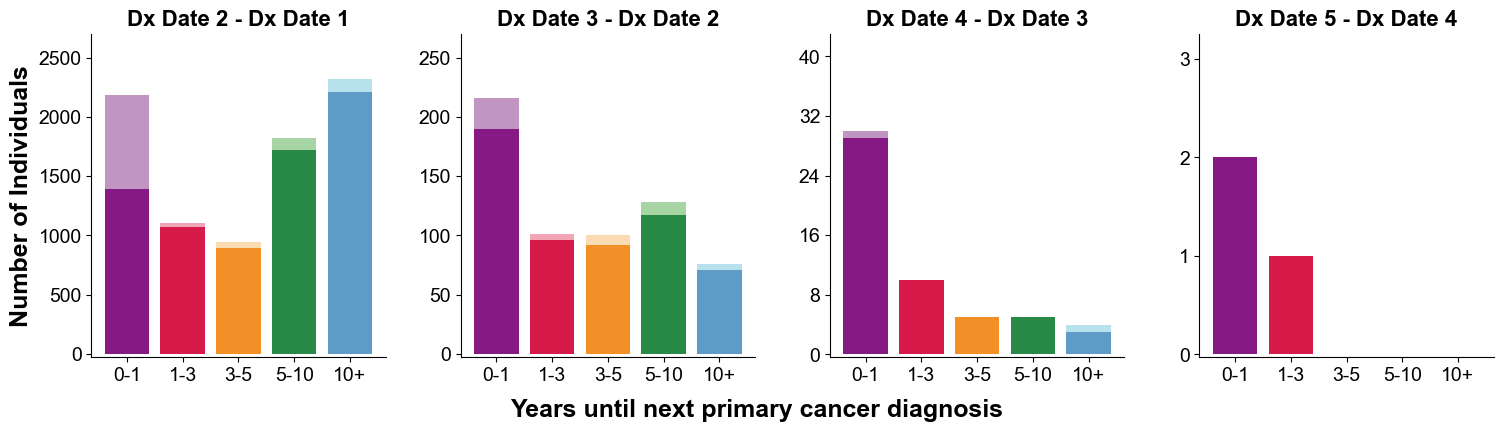

In [42]:
plt.rcParams['font.family'] = "Arial"
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'normal'

from matplotlib.font_manager import FontProperties
# 定义一个FontProperties对象
labelfont = FontProperties(family='sans',weight="bold",size=12)

fig, ax = plt.subplots(1, 4,figsize=(15, 4))
fig.tight_layout(w_pad=1)

for b in ax:
    b.spines['right'].set_color('none')
    b.spines['top'].set_color('none')
    b.set_xlabel("",fontweight="bold",fontsize=16)
    b.set_ylabel("",fontweight="bold",fontsize=16)

x = ["0-1","1-3","3-5","5-10","10+"]
y1_12 = list(diffcancer2_1YearDict.values())
y2_12 = list(samecancer2_1YearDict.values())
    
#colors1 = ["#7d3c98","#2f86c1","#138d75","#ca6f1d","#cb4335"]
#colors2 = ["#bb8fce","#85c1e9","#73c6b5","#f8c370","#f19489"]

colors1 = ["#861A85","#D61B4A","#F28F27","#288A46","#5D9CC6"]
colors2 = ["#C195C2","#F2A5B4","#FADBB2","#A6D4A3","#B7E1ED"]

ax[0].bar(x, y1_12,color=colors1)
ax[0].bar(x, y2_12,bottom=y1_12,color=colors2)
ax[0].set_ylabel("Number of Individuals",fontweight="bold",fontsize=18)
ax[0].set(ylim=[-30,2700])
ax[0].set_title("Dx Date 2 - Dx Date 1",fontweight="bold",fontsize=16)


y1_23 = list(diffcancer3_2YearDict.values())
y2_23 = list(samecancer3_2YearDict.values())

ax[1].bar(x, y1_23,color=colors1)
ax[1].bar(x, y2_23,bottom=y1_23,color=colors2)
ax[1].set(ylim=[-3,270],yticks=[0,50,100,150,200,250])
ax[1].set_title("Dx Date 3 - Dx Date 2",fontweight="bold",fontsize=16)


y1_34 = list(diffcancer4_3YearDict.values())
y2_34 = list(samecancer4_3YearDict.values())

ax[2].bar(x, y1_34,color=colors1)
ax[2].bar(x, y2_34,bottom=y1_34,color=colors2)
ax[2].set(ylim=[-0.4,43],yticks=[0,8,16,24,32,40])
ax[2].set_title("Dx Date 4 - Dx Date 3",fontweight="bold",fontsize=16)
ax[2].set_xlabel("Years until next primary cancer diagnosis",x=-0.25,y=0,labelpad=10,fontsize=18,fontweight="bold")

y1_45 = list(diffcancer5_4YearDict.values())
y2_45 = list(samecancer5_4YearDict.values())

ax[3].bar(x, y1_45,color=colors1)
ax[3].bar(x, y2_45,bottom=y1_45,color=colors2)
ax[3].set(ylim=[-0.03,3.25],yticks=[0,1,2,3])
ax[3].set_title("Dx Date 5 - Dx Date 4",fontweight="bold",fontsize=16)

plt.savefig("/home/luohh/UKB50wMultiPcancer/05.otherAnalysis/01.globlePattern/04.plot/7.cancersTime.pdf",bbox_inches='tight',format="pdf")